<a href="https://colab.research.google.com/github/ahmadharimukti/contohbaru/blob/main/bert_cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


#tweets = pd.read_csv(r'C:\Users\TeYan\OneDrive\Work\Kaggle\Tweets_Disaster\Data\train.csv')
#tweets = pd.read_csv('/Users/teyang/OneDrive/Work/Kaggle/Tweets_Disaster/Data/train.csv')

Mounted at /content/drive/


In [2]:

tweets = pd.read_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/trainkedua.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/data/Twitter Spam/test.csv')

In [3]:
tweets.head()

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",1,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",0,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,1,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,1,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",1,NaN


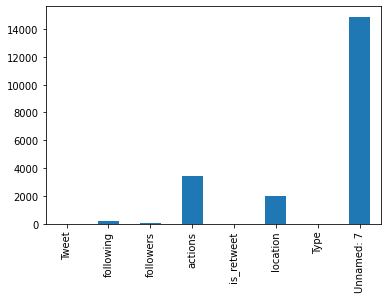

In [4]:
tweets.isnull().sum().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Samples')

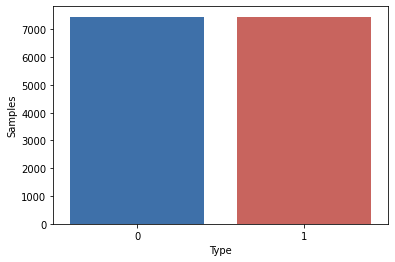

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

color = [sns.xkcd_rgb['medium blue'], sns.xkcd_rgb['pale red']]
sns.countplot('Type',data = tweets, palette = color)
plt.gca().set_ylabel('Samples')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

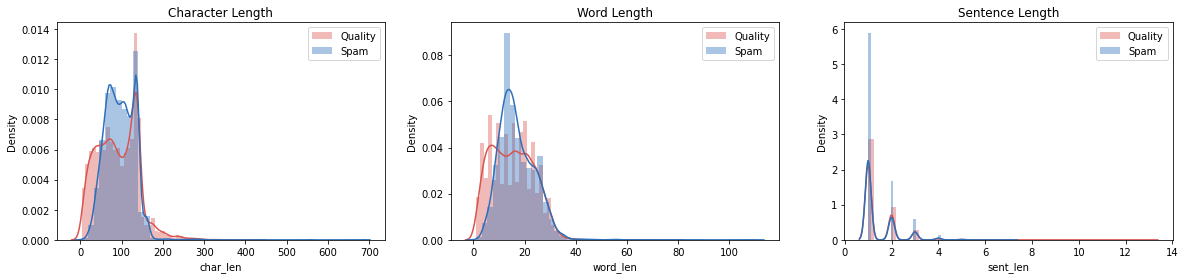

In [14]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# count number of characters in each tweet
tweets['char_len'] = tweets.Tweet.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in tweets.Tweet]
tweets['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in tweets.Tweet]
tweets['sent_len'] = sent_tokens

plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(tweets[tweets.Type == 1][plot_cols[i]], label='Quality', color=color[1]).set_title(plot_titles[i])
    sns.distplot(tweets[tweets.Type == 0][plot_cols[i]], label='Spam', color=color[0])
    plt.legend()

In [15]:
tweets[tweets.sent_len > 8]
tweets[tweets.word_len > 50]

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7,char_len,word_len,sent_len
1533,'@fyahlite @nyafromfire @MzNatTurner @Fresh_Fl...,299.0,709.0,11501.0,1.0,Miami / Scotland,0,NaN,552,88,2
1646,ONLINE DEALS : http://www.sherif.ws/main2.php?...,NaN,0.0,0.0,0.0,USA,1,NaN,424,75,1
3362,ONLINE DEALS : http://www.sherif.ws/main2.php?...,NaN,0.0,0.0,0.0,USA,1,NaN,424,78,1
4766,"Chips, a hero US Army dog who ran nose-first i...",3677.0,3736.0,596.0,0.0,habbo.nl,0,NaN,301,61,3
5678,'@CNNPolitics @CNN @CNNI @CNNPolitics @CNNSitR...,247.0,2539.0,156901.0,0.0,United States,0,NaN,295,66,7
5803,'@JulianSvendsen @klralms @realDonaldTrump PRE...,245.0,2539.0,156471.0,1.0,United States,0,NaN,324,58,3
7195,'@DailyCaller Lets get rid of all current poli...,246.0,2206.0,147804.0,1.0,United States,0,NaN,292,56,5
7479,'@Hakimyasin @ThisGuysTaint @gazafreee @Palest...,514.0,897.0,9053.0,1.0,United States,0,NaN,684,110,1
7898,via @IHSforHaiti YOU ARE HIGHLY BLESSED AND FA...,0.0,0.0,NaN,0.0,"Cleveland, OH",1,NaN,135,57,4
9035,"CNN: ""First lady Melania Trump's plane arrive...",4373.0,4436.0,620.0,0.0,United States,0,NaN,274,56,1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Top Stopwords for  Quality Tweets')

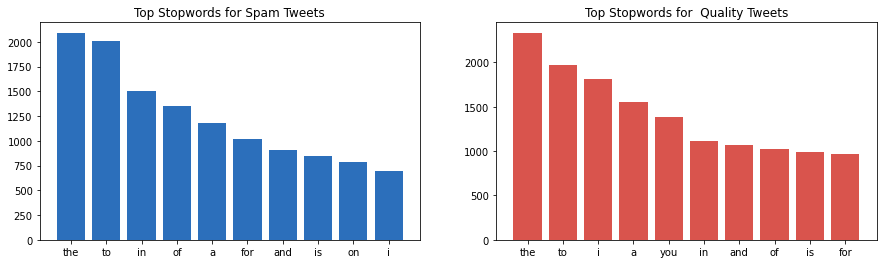

In [18]:
## Plot most common stopwords

nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Spam
[corpus0.append(word.lower()) for tweet in tweets[tweets.Type == 0].Tweet for word in word_tokenize(tweet)]
corpus1 = [] # Quality
[corpus1.append(word.lower()) for tweet in tweets[tweets.Type == 1].Tweet for word in word_tokenize(tweet)]

# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Spam Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Quality Tweets')

Text(0.5, 1.0, 'Top Punctuations for Quality Tweets')

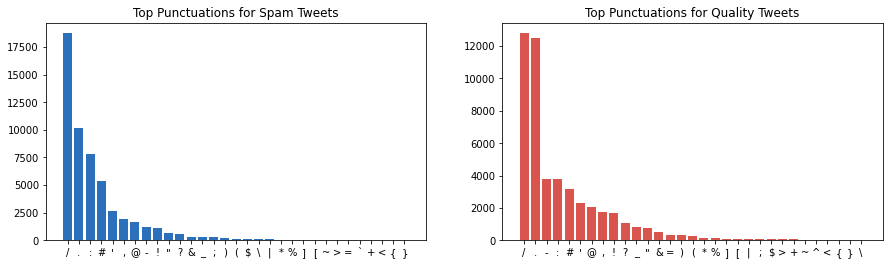

In [19]:
## Plot most common punctuations

from string import punctuation

# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Spam
[corpus0.append(c) for tweet in tweets[tweets.Type == 0].Tweet for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Quality
[corpus1.append(c) for tweet in tweets[tweets.Type == 1].Tweet for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

from collections import Counter
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Spam Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Quality Tweets')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

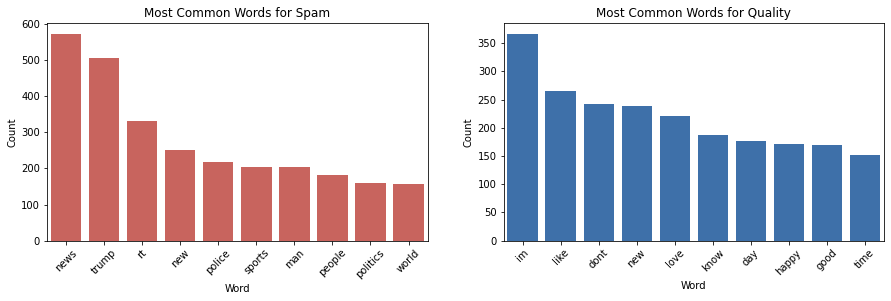

In [20]:
## Plot most common words
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Get all the word tokens in dataframe for Quality and Spam
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Spam
[corpus0.append(word.lower()) for tweet in tweets[tweets.Type == 0].Tweet for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Quality
[corpus1.append(word.lower()) for tweet in tweets[tweets.Type == 1].Tweet for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

# Plot for Quality and Spam
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Spam')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Quality')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Quality')

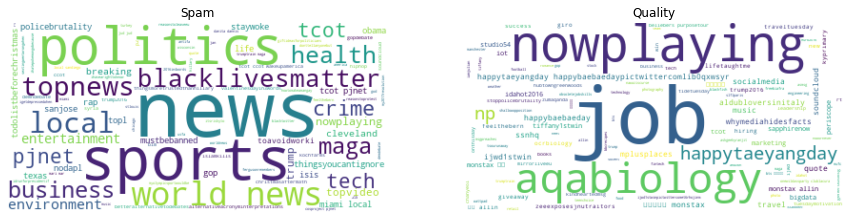

In [22]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

from wordcloud import WordCloud

def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in tweets[tweets.Type == target].Tweet for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Spam')
wc_hash(1)
plt.title('Quality')

In [27]:
from textblob import TextBlob

# polarity and subjectivity
tweets['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in tweets.Tweet]
tweets['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in tweets.Tweet]

#############################################################################################################################
# exclaimation and question marks
tweets['exclaimation_num'] = [tweet.count('!') for tweet in tweets.Tweet]
tweets['questionmark_num'] = [tweet.count('?') for tweet in tweets.Tweet]

#############################################################################################################################
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word 
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word 
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in tweets.Tweet])
tweets = tweets.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

#############################################################################################################################
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
tweets['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in tweets.Tweet]

In [28]:
tweets.head()

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",1,NaN,30,5,1,0.6,0.600000,0,0,0,0,1,0
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",0,NaN,40,9,1,0.0,0.000000,0,0,0,0,1,0
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,1,NaN,82,16,1,0.0,0.100000,0,0,0,1,0,1
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,1,NaN,149,17,1,0.0,0.000000,0,0,1,2,0,0
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",1,NaN,108,22,1,0.0,0.333333,0,0,0,2,0,0


In [32]:
## Replace NaNs with 'None'

#############################################################################################################################
## Expand Contractions

# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

tweets.text = [decontraction(tweet) for tweet in tweets.Tweet]

#############################################################################################################################
## Remove Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("OMG there is a volcano eruption!!! 😭😱😷"))

tweets.Tweet = tweets.Tweet.apply(lambda x: remove_emoji(x))

OMG there is a volcano eruption!!! 


In [33]:
#############################################################################################################################
## Remove URLs
tweets.text = tweets.Tweet.apply(lambda x: remove_url(x))

#############################################################################################################################
## Remove Punctuations except '!?'

def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

tweets.Tweet = tweets.Tweet.apply(lambda x: remove_punct(x))

#############################################################################################################################
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

tweets.Tweet = tweets.Tweet.apply(lambda x: replace_amp(x))

#############################################################################################################################

In [36]:
pip install wordsegment

     |████████████████████████████████| 4.8 MB 5.2 MB/s 


In [37]:
import wordsegment
help(wordsegment)

Help on package wordsegment:

NAME
    wordsegment - English Word Segmentation in Python

DESCRIPTION
    Word segmentation is the process of dividing a phrase without spaces back
    into its constituent parts. For example, consider a phrase like "thisisatest".
    For humans, it's relatively easy to parse. This module makes it easy for
    machines too. Use `segment` to parse a phrase into its parts:
    
    >>> from wordsegment import load, segment
    >>> load()
    >>> segment('thisisatest')
    ['this', 'is', 'a', 'test']
    
    In the code, 1024908267229 is the total number of words in the corpus. A
    subset of this corpus is found in unigrams.txt and bigrams.txt which
    should accompany this file. A copy of these files may be found at
    http://norvig.com/ngrams/ under the names count_1w.txt and count_2w.txt
    respectively.
    
    Copyright (c) 2016 by Grant Jenks
    
    Based on code from the chapter "Natural Language Corpus Data"
    from the book "Beautiful Dat

In [38]:
from wordsegment import load, segment
load()
segment('thisisatest')

['this', 'is', 'a', 'test']

In [39]:
tweets.Tweet = tweets.Tweet.apply(lambda x: ' '.join(segment(x)))

In [41]:
## Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

tweets.Tweet = tweets.Tweet.apply(lambda x: lemma(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [42]:
## Ngrams
from nltk.util import ngrams

def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords


# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return

In [45]:
# Bigrams

bigrams_disaster = tweets[tweets.Type==1].Tweet.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = tweets[tweets.Type==0].Tweet.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1            

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])

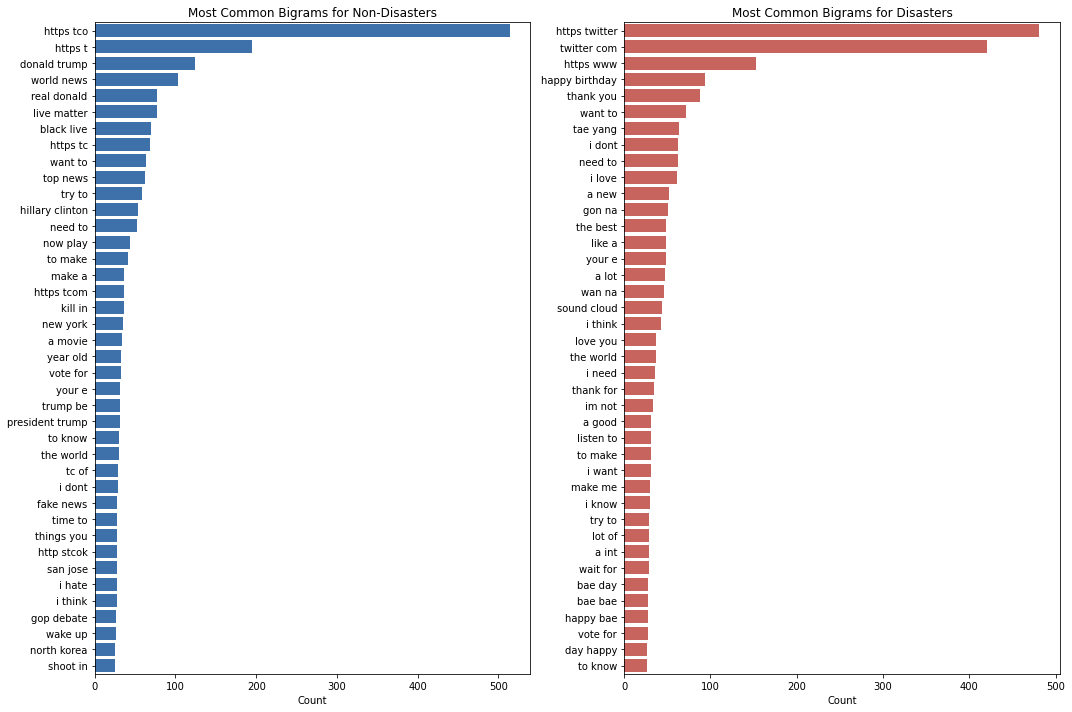

In [46]:
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

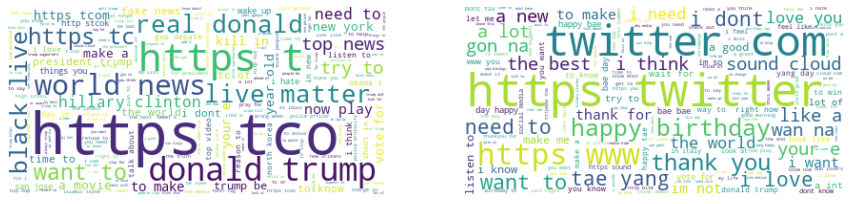

In [47]:
# Woudcloud for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_nd_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_d_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [50]:
# Trigrams

trigrams_disaster = tweets[tweets.Type==1].Tweet.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = tweets[tweets.Type==0].Tweet.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1            

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])

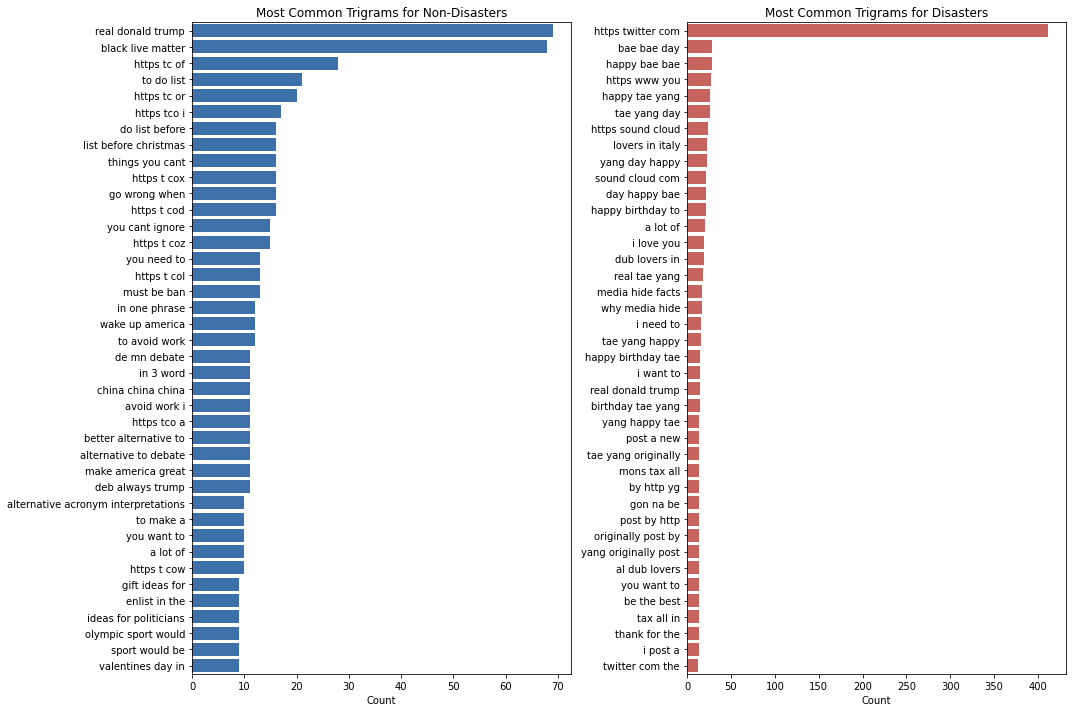

In [51]:
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [52]:
## Remove Stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#tweets_tmp = tweets.copy()
tweets['text_nostopwords'] = tweets.Tweet.apply(lambda x: remove_stopwords(x))

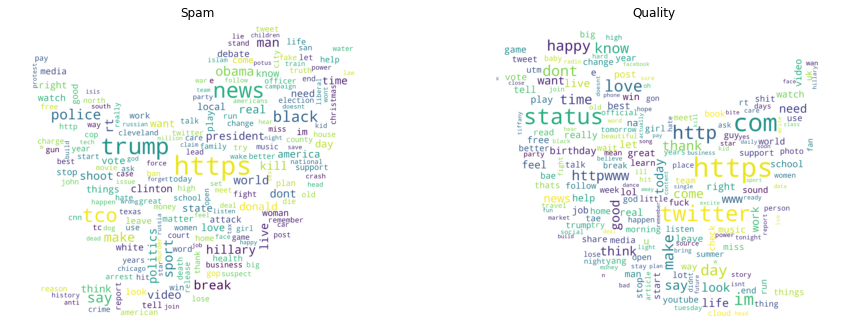

In [56]:
## Plot word cloud for most common words after cleaning

from PIL import Image
mask = np.array(Image.open('drive/My Drive/Colab Notebooks/data/Twitter Spam/Pictures/Twitter-Logo.png'))
reverse = mask[...,::-1,:]

def wc_words(target, mask=mask):
    words = [word.lower() for tweet in tweets[tweets.Type == target].text_nostopwords for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))
    dict = {}
    for w in words:
        if w in dict:
            dict[w] += 1
        else:
            dict[w] = 1
    # plot using frequencies        
    my_cloud = WordCloud(background_color='white', stopwords=stop, mask=mask, random_state=0).generate_from_frequencies(dict) 
    
    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,10))
wc_words(0)
plt.title('Spam')
wc_words(1, reverse)
plt.title('Quality')
plt.show()

In [58]:
pd.options.display.max_colwidth = 200
for t in tweets['Tweet'].sample(n=20, random_state=0):
    print(t)
pd.reset_option('max_colwidth')

city and guilds congratulations to all the fantastic medals for excellence winners north lancs pictwittercomjk1kvng2ia
360wise news can south korean startups and the government save its flail giant tech conglomerate httpdldbze7gd6
americans refuse to accept donald trump as president protest erupt across america httpstco5bv7hn0wxm
cutest little gem pictwittercomaj8wyrb3bq
reason to leave eu expensive bitch
kodak why u act like dat why us trap like at pictwittercomlhblcuwg6y
pauline charles harris be a great one dimensional pass rusher https t cos rwq5nrwzmhttpstco90v8ae4 ngh
rt americanvoter us cnn producer call us stupid as shit hillary clinton call us just plain stupid real donalhttpstco6rhi2fthdd
when people judge and criticize you just remember it say nothing about you and everything about them
china stock retreat despite new move to stave off crash business
you know you out stay your age limit when httpfbme4cduymncw
you know japan pictwittercomf0onb6tzz5
archive hedge bz even laura

In [59]:
pd.reset_option('max_colwidth')
tweets.drop('text_nostopwords', axis=1, inplace=True)
tweets.head()

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,good morning love lee brown v,0.0,0.0,0.0,0.0,"Pennsylvania, USA",1,NaN,30,5,1,0.6,0.600000,0,0,0,0,1,0
1,real donald trump us navy rip to heroes,42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",0,NaN,40,9,1,0.0,0.000000,0,0,0,0,1,0
2,havent be follow the news but i understand eff...,0.0,0.0,NaN,0.0,Will never be broke ever again,1,NaN,82,16,1,0.0,0.100000,0,0,0,1,0,1
3,pictwittercomdy9q4ftlhz what to do with paper ...,0.0,0.0,0.0,0.0,Mundo,1,NaN,149,17,1,0.0,0.000000,0,0,1,2,0,0
4,do you know mahatma gandhi make a brief visit ...,17800.0,35100.0,NaN,0.0,"Nottingham, England",1,NaN,108,22,1,0.0,0.333333,0,0,0,2,0,0


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweets.drop(['Tweet','following','followers','actions','is_retweet','location','Type'],axis=1), tweets[['Type']], test_size=0.2, stratify=tweets[['Type']], random_state=0)
X_train_text = X_train['tweet']
X_val_text = X_val['tweet']

print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)

KeyError: ignored